# FINAL SCRIPT FOR OBJECT RECOGNITION TESTING

## Calibration

Change the following cell's type to Code to run Calibration

import kinect_vision as kv
from image_processing import run_calibration, run_calibration_rgb
from matplotlib import pyplot as plt

import os
from kinect_vision import PATH_TO_KINECT_IMAGES_DIR
#%matplotlib inline
import numpy as np
import cv2
calibrate_check1 = raw_input("Prepared for Empty Capture?: ")
if calibrate_check1 == "yes":
    print "empty"
    empt = kv.capture_frames()
    plt.imshow(empt['ir'])
    plt.show()
    empt_all = kv.prepare_im_array(empt)
    rgb, depth, ir = empt_all
    np.savez(os.path.join(PATH_TO_KINECT_IMAGES_DIR, 'im_array_empty_FINAL'), rgb=rgb, depth=depth, ir=ir)

calibrate_check2 = raw_input("Prepared for Calibrate Capture?: ")
if calibrate_check2 == "yes":
    cali = kv.capture_frames()
    print "cali"
    cali_all = kv.prepare_im_array(cali)
    rgb, depth, ir = cali_all
    
    np.savez(os.path.join(PATH_TO_KINECT_IMAGES_DIR, 'im_array_cal_FINAL'), rgb=rgb, depth=depth, ir=ir)

# Prepare Calibration data for image processing

In [1]:
import copy

import cv2
from matplotlib import pyplot as plt
from object_data_csv import create_object_df, prepare_object_dict, add_to_csv, create_csv

##################################### Vision Imports ###########################################
import numpy as np
import os
import vision_tools as vt
from vision_tools import normclean2cv2
import kinect_vision as kv
from kinect_vision import PATH_TO_KINECT_IMAGES_DIR
from image_processing import run_calibration, run_calibration_rgb
from image_processing import run_image_processing_v2_depth, run_image_processing_v2_rgb

from tableObject_class import TableObject, match_rgb_with_depth, match_rgb_with_depth_v2


##################### Vision Initialise #####################################
directory = PATH_TO_KINECT_IMAGES_DIR

cali = kv.load_npz_as_array("im_array_cal_FINAL", directory)
empt = kv.load_npz_as_array("im_array_empty_FINAL", directory)

empt_all = kv.prepare_im_array(empt)
cali_all = kv.prepare_im_array(cali)

depth_cali = run_calibration(empt_all, cali_all, adjust=False)
rgb_cali = run_calibration_rgb(empt_all, cali_all, depth_cali, adjust=False)


{'radius': [8, 16], 'thresh': [85, 100]}
21
All Calibration points found
{'radius': [5, 8], 'thresh': [85, 220]}
22
All Calibration points found
(174, 198)


# Take Picture

In [2]:
while(1):
    capture_check = raw_input("Ready?: ")
    if capture_check == "yes":
        test = kv.capture_frames()
        test_all = kv.prepare_im_array(test)
        break

######## Process Test Image and Retrieve Depth and Contour Information from Depth and RGB Data ##########

rgb, depth, ir = test_all


normclean, sorted_family = run_image_processing_v2_depth(test_all, 
                                                         depth_cali, 
                                                         show=False)

rgbnormclean, rgb_family, test_rgbx_img = run_image_processing_v2_rgb(test_all, 
                                                                      rgb_cali, 
                                                                      depth_cali, 
                                                                      show=False)

######## Clean the images and convert them so that they are cv2 compatible ############

depth_normclean = normclean2cv2(normclean)
rgb_normclean = normclean2cv2(rgbnormclean)

#
test_rgb_img = vt.convert2rgb(test_rgbx_img)

cv2.imwrite("test_rgb_img.jpg", test_rgb_img)

####### Create List of Objects and match the rgb and depth data ##########
# Note that the label here is False which means that depth profiles will be overlaid with their 
# rgb counterparts objects will be labelled based on their spatial distances

object_list = match_rgb_with_depth_v2(sorted_family, rgb_family, depth_normclean, test_rgb_img, label=False)



#cv2.imwrite("test_rgb_img.jpg", test_rgb_img)
cv2.imwrite("depth_normclean.jpg", depth_normclean)

Ready?: yes
[1]
[3]
[5]
[7]
Depth Done
(174, 198)
[1]
[3]
[5, 6]
[8]
[10, 11, 12, 13]
Making depth List ...
1
RGB data not considered
An exception of type AttributeError occurred. Arguments:
("'TableObject' object has no attribute 'rgb_box'",)
3
RGB data not considered
An exception of type AttributeError occurred. Arguments:
("'TableObject' object has no attribute 'rgb_box'",)
5
RGB data not considered
An exception of type AttributeError occurred. Arguments:
("'TableObject' object has no attribute 'rgb_box'",)
7
RGB data not considered
An exception of type AttributeError occurred. Arguments:
("'TableObject' object has no attribute 'rgb_box'",)
Making rgb object list...
Depth data not implemented
An exception of type AttributeError occurred. Arguments:
("'TableObject' object has no attribute 'box'",)
item
Depth data not implemented
An exception of type AttributeError occurred. Arguments:
("'TableObject' object has no attribute 'box'",)
item
Depth data not implemented
An exception of typ

True

# Do Object Recognition

In [1]:
import object_recognition_tools as ort

excluded_val = ['centre', 'rgb_centre', 'number of children']
extras = ['R','G','B', 'centre_offset']

obj_features_mean, obj_features_std = ort.prepare_obj_features_param(obj_feat_csv = 'object_features.csv', 
                                                                 excluded_val = excluded_val, 
                                                                 extras=extras)

rec_df = ort.prepare_pick_obj_features_param(object_list, excluded_val, extras)
rec_df

NameError: name 'object_list' is not defined

In [4]:
cost_list = ort.create_cost_list(obj_features_mean, obj_features_std, rec_df)
#cost_list

{'1': <tableObject_class.TableObject object at 0x7f2b30abbd10>, '3': <tableObject_class.TableObject object at 0x7f2b30abbd50>, '2': <tableObject_class.TableObject object at 0x7f2b3f3b9e90>, '5': <tableObject_class.TableObject object at 0x7f2b30abbdd0>, '4': <tableObject_class.TableObject object at 0x7f2b30abbd90>}
Index([u'measure', u'mug'], dtype='object', name=u'name')
NAME:  measure
item


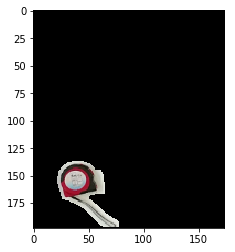

Index([u'mug', u'book'], dtype='object', name=u'name')
NAME:  mug
item


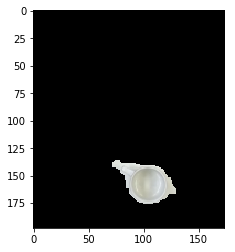

Index([u'tape', u'mug'], dtype='object', name=u'name')
NAME:  tape
item


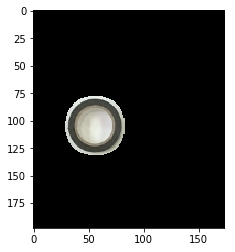

Index([u'ball', u'mug'], dtype='object', name=u'name')
NAME:  ball
item


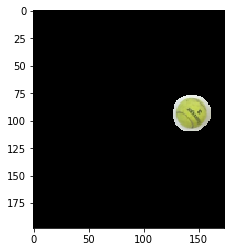

Index([u'cd', u'mug'], dtype='object', name=u'name')
NAME:  cd
item


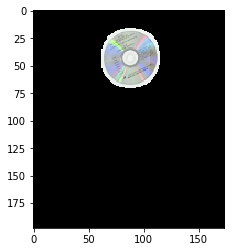

In [12]:
def label_object_list(original_obj_list, cost_list, image, show=False):
    object_list = copy.copy(original_obj_list)
    print object_list.keys()
    for i,item in enumerate(sorted(object_list.keys())):
        print cost_list[i].keys()[0:2]
        print "NAME: ", cost_list[i].keys()[0]
        object_list[item].label_object(image, name=cost_list[i].keys()[0], show=show)
    return object_list

new4=ort.label_object_list(object_list, cost_list, test_rgb_img, show=True)
    

In [9]:
#new3_object_list = ort.label_object_list(object_list, cost_list, test_rgb_img, show=True)

In [11]:
new4['1'].name

'measure'

In [16]:
excluded_val = ['centre', 'rgb_centre', 'number of children']
extras = ['R','G','B', 'centre_offset']


obj_features_mean, obj_features_std = ort.prepare_obj_features_param(obj_feat_csv = 'object_features.csv', 
                                                                 excluded_val = excluded_val, 
                                                                 extras=extras)

In [17]:
obj_features_mean

,area,aspect,circularness,fill,rgb_area,rgb_aspect,rgb_circularness,rgb_fill,median_height,mean_height,R,G,B,centre_offset
name,,,,,,,,,,,,,,
ball,502.035714,0.954945,0.866180,0.830653,897.107143,0.913073,0.842270,0.838870,0.174222,0.177406,183.029448,122.420027,191.226193,1.075268
banana,964.375000,0.403881,0.234752,0.461588,1874.291667,0.505604,0.372931,0.585919,0.078347,0.083363,203.878207,125.391568,191.448638,3.980036
book,788.941176,0.628345,0.374370,0.582397,5771.117647,0.677652,0.615910,0.948054,0.088492,0.089711,60.310897,56.029837,62.464600,11.159068
book_part,NaN,0.412689,0.428042,0.818182,432.000000,0.412689,0.428042,0.818182,0.000000,0.000000,45.249471,57.147992,48.775899,0.000000
box,2882.850000,0.981453,0.665695,0.973494,3602.950000,0.895985,0.682270,0.890854,0.363577,0.308488,169.222520,94.553838,107.736046,2.964349
cd,NaN,0.977289,0.917026,0.820212,2317.777778,0.977289,0.917026,0.820212,0.000000,0.000000,185.216393,191.876348,195.487418,0.000000
eraser,1316.947368,0.473762,0.488231,0.925550,4372.657895,0.524177,0.534504,0.943442,0.098635,0.104551,144.687351,142.630870,144.919922,10.098300
joined,NaN,0.562779,0.367961,0.537002,8094.500000,0.562779,0.367961,0.537002,0.000000,0.000000,95.713239,96.176117,100.645243,0.000000
measure,672.611111,0.889583,0.745873,0.794495,1619.666667,0.467891,0.291877,0.519346,0.097990,0.104594,163.675380,145.027168,143.477217,21.989529


In [18]:
obj_features_std

,area,aspect,circularness,fill,rgb_area,rgb_aspect,rgb_circularness,rgb_fill,median_height,mean_height,R,G,B,centre_offset
name,,,,,,,,,,,,,,
ball,20.957342,0.026263,0.015031,0.021468,112.505415,0.095092,0.082455,0.025061,0.051484,0.043545,4.116969,10.176422,4.397051,0.579519
banana,70.611654,0.039778,0.009150,0.045600,67.735266,0.017818,0.017766,0.027458,0.014163,0.010752,5.777326,7.339853,6.282440,3.102578
book,458.173612,0.222437,0.091138,0.172559,58.801980,0.009033,0.016968,0.017273,0.017235,0.011037,3.294822,4.498847,3.626936,9.180003
book_part,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
box,84.600056,0.011115,0.025013,0.013481,231.040936,0.062663,0.063648,0.084490,0.024483,0.016663,3.867442,5.477150,3.918572,1.804451
cd,NaN,0.012449,0.006482,0.013147,25.624831,0.012449,0.006482,0.013147,0.000000,0.000000,3.053500,4.516731,2.797740,0.000000
eraser,52.027208,0.022177,0.032775,0.030941,89.282176,0.007508,0.011171,0.012036,0.028343,0.026003,2.592633,3.358644,2.723429,1.603304
joined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
measure,36.654449,0.052072,0.032093,0.024898,61.377418,0.062515,0.043750,0.038592,0.012728,0.011159,4.663095,6.555012,5.157793,3.172062


In [10]:
import pandas as pd
import copy
import object_recognition_tools as ort
import numpy as np
import ast

obj_feat_csv = "object_features.csv"
obj_feat_df = pd.read_csv(obj_feat_csv)
object_features = copy.copy(obj_feat_df)

object_features = object_features.drop("Unnamed: 0", 1)

included_val = [i for i in list(object_features.columns.values) if i not in excluded_val]
for i in extras:
    included_val.append(i)

xxx = object_features.centre.apply(lambda x: ort.extract_centres(x))
yyy = object_features.rgb_centre.apply(lambda x: ort.extract_centres(x))

if 'R' in extras and 'B' in extras and 'G' in extras:
    object_features.rgb_average = object_features.rgb_average.apply(lambda x: 
                                                                    np.array(ast.literal_eval(x)))
    object_features[['R','G', 'B']] = pd.DataFrame([x for x in object_features.rgb_average])
    object_features.drop("rgb_average",1)

if 'centre_offset' in extras:
    object_features['centre_offset'] = xxx.subtract(yyy).apply(lambda x: np.sqrt(x[0]**2+x[1]**2))
    object_features['centre_offset'].fillna(0, inplace=True)


In [22]:
obj_features_mean.rgb_area.ball

897.10714285714289

In [15]:
object_features[object_features['name']=='book']

,name,area,aspect,centre,circularness,fill,number of children,rgb_area,rgb_aspect,rgb_centre,rgb_circularness,rgb_fill,rgb_average,median_height,mean_height,R,G,B,centre_offset
71,book,605.5,0.517277,"(67.0, 80.5)",0.246701,0.428673,0,5822.5,0.684992,"(51.0, 77.5)",0.606017,0.953102,"[61.1099564197, 56.4341267181, 63.2876299028]",0.071030,0.079517,61.109956,56.434127,63.287630,16.278821
74,book,1496.0,0.980206,"(47.5, 140.0)",0.576325,0.757085,0,5796.0,0.656867,"(58.5, 136.0)",0.555489,0.906758,"[63.6244115669, 59.0512777404, 65.4377942165]",0.060222,0.068454,63.624412,59.051278,65.437794,11.704700
78,book,492.0,0.477044,"(122.0, 133.0)",0.277181,0.451376,0,5762.0,0.681029,"(123.05796813964844, 122.96006774902344)",0.614230,0.952239,"[57.1892120392, 51.582177883, 58.394825837]",0.066686,0.074855,57.189212,51.582178,58.394826,10.095521
81,book,269.5,0.471233,"(60.5, 147.5)",0.459964,0.834365,0,5761.0,0.686307,"(62.94810485839844, 142.54612731933594)",0.624529,0.940879,"[55.6513202437, 48.5396073121, 57.374915369]",0.107353,0.101792,55.651320,48.539607,57.374915,5.082342
83,book,353.5,0.424544,"(136.5, 96.0)",0.407317,0.789062,0,5817.5,0.670213,"(132.0, 65.0)",0.613979,0.982354,"[63.6480737018, 61.1338358459, 66.1909547739]",0.107743,0.095421,63.648074,61.133836,66.190955,31.324910
86,book,1417.5,0.979470,"(142.7264404296875, 91.90052032470703)",0.365913,0.424528,0,1973.0,0.665131,"(141.5, 81.5)",0.214014,0.312085,"[108.063791554, 107.402515723, 110.656334232]",0.081528,0.085110,108.063792,107.402516,110.656334,10.969298
91,book,262.0,0.423077,"(56.5, 137.84616088867188)",0.450123,0.916084,0,5692.5,0.663172,"(61.0, 136.5)",0.621336,0.947329,"[53.6955331165, 46.9436933082, 55.144788636]",0.108296,0.102071,53.695533,46.943693,55.144789,4.863981
94,book,1076.5,0.916667,"(76.5, 44.5)",0.252605,0.326212,0,5756.5,0.680780,"(77.15985107421875, 42.22688674926758)",0.632480,0.956547,"[59.0529879804, 55.3908921618, 61.832232944]",0.079213,0.077971,59.052988,55.390892,61.832233,1.891913
97,book,428.5,0.991809,"(112.05123901367188, 52.64841079711914)",0.392553,0.427431,0,5803.5,0.691617,"(109.0, 52.5)",0.621726,0.951315,"[58.7007556675, 54.9215785055, 61.3274559194]",0.100426,0.100024,58.700756,54.921579,61.327456,3.119374
100,book,293.0,0.419355,"(142.0, 109.5)",0.374177,0.727047,0,5815.0,0.673416,"(135.01861572265625, 109.81786346435547)",0.622200,0.959888,"[56.2574157868, 51.4720965309, 57.8776604659]",0.110585,0.101363,56.257416,51.472097,57.877660,7.029127
